# Evaluating a model

## 1. Divide the dataset into `Train set` and `Test set`


```
----------------------------------------------------------
|                       (X, y)                           |
----------------------------------------------------------
                           |
                   train_test_split(X, y)
                           |
                          
----------------------------------------------------------
|          (X_train, y_train)         | (X_test, y_test) |
----------------------------------------------------------
          (80%)                             (20%)
           /                                   \
          /                                     \

    model.fit(X_train, y_train)            model.score(X_test, y_test)
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Dataset

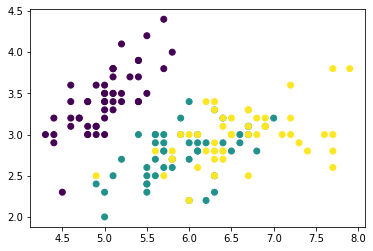

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

# plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y)

### Split the dataset into Train set and Test set

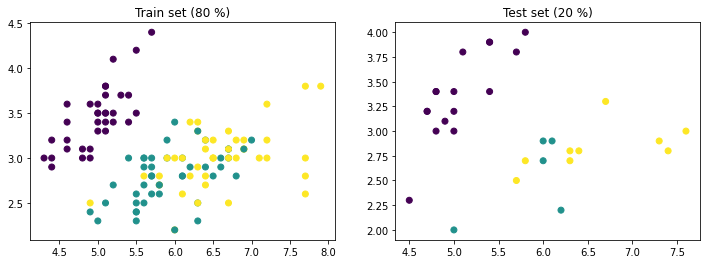

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# plot Train-set and Test-set
plt.figure(figsize=(12, 4))

# plot Train-set
plt.subplot(121)
train_size = len(y_train) / len(y) * 100
plt.title("Train set (%d %%)" % train_size)
_ = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

# plot Test-set
plt.subplot(122)
test_size = len(y_test) / len(y) * 100
plt.title("Test set (%d %%)" % test_size)
_ = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

### Apply this on a model

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Create a classification model
model = KNeighborsClassifier(n_neighbors=1)

# Training the model on the data (X_train, y_train)
model.fit(X_train, y_train)

# Evaluate the model 
# Train score / evaluate the model with train set
train_score = model.score(X_train, y_train)
print("Train score: ", train_score)

# Test score / evaluate the model with test set
test_score = model.score(X_test, y_test)
print("Test score: ", test_score)

Train score:  1.0
Test score:  0.9333333333333333


## 2. Cross validation

### $-$ The function `model_selection.cross_val_score()`

In [5]:
from sklearn.model_selection import cross_val_score

# Create a classification model
model = KNeighborsClassifier(n_neighbors=1)

# cross validation
cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()

0.9666666666666666

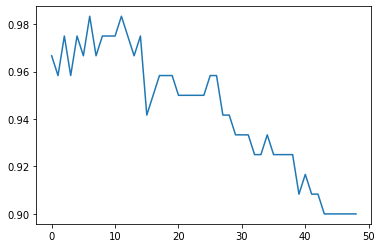

In [6]:
# Evaluate the model with `cross validation` and number of neighbors
val_score = []
for k in range(1, 50):
    # Create a classification model with k neighbors
    model = KNeighborsClassifier(n_neighbors=k)
    # cross validation
    score = cross_val_score(model, X_train, y_train, cv=5).mean()
    val_score.append(score)

# plot result
plt.plot(val_score)

### $-$ The function `model_selection.validation_curve()`

Number of neighbors:  7


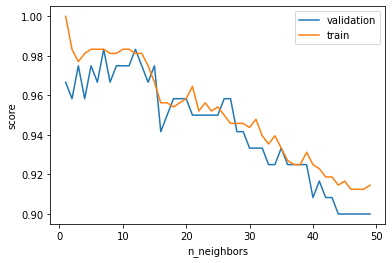

In [7]:
from sklearn.model_selection import validation_curve

# Create a classification model
model = KNeighborsClassifier()

# list of number of neighbors
k = np.arange(1, 50)

# Train score and Validation score
train_score, val_score = validation_curve(
    model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

# Plot the validation score and train score
# validation score
plt.plot(k, val_score.mean(axis=1), label="validation")
# train score
plt.plot(k, train_score.mean(axis=1), label="train")
plt.legend()
plt.ylabel("score")
plt.xlabel("n_neighbors")

# The best params
n_neighbors = k[np.argmax(val_score.mean(axis=1))]
print("Number of neighbors: ", n_neighbors)

In [8]:
# The best model
model = KNeighborsClassifier(n_neighbors=n_neighbors)

# Training the model
model.fit(X_train, y_train)

# Evaluate the model 
# test score
test_score = model.score(X_test, y_test)
print("Test score: ", test_score)

Test score:  0.9666666666666667


### $-$ The class `model_selection.GridSearchCV()`


                                       n_neighbors
                                
                             .--------------^--------------.
                           
                               1    2    3    4    ...    n
             ..                |    |    |    |           |
             |    euclidean  --o----o----o----o--  ...  --o--
             |                 |    |    |    |           |
    metric  <     manhattan  --o----o----o----o--  ...  --o--
             |                 |    |    |    |           |
             |    Minkowski  --o----o----o----o--  ...  --o--
             ..

In [9]:
from sklearn.model_selection import GridSearchCV

# Create a classification model
model = KNeighborsClassifier()

# The different parameters
param_grid = {
    "n_neighbors": np.arange(1, 50), 
    "metric": ["euclidean", "manhattan"]
}

# Create a model grid with all the hyperparameter combinations 
# present in `param_grid`
grid = GridSearchCV(model, param_grid=param_grid, cv=5)

# Training the model
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [10]:
# best score
b_score = grid.best_score_
print("Best ccore:", b_score)

# best parameters
b_param = grid.best_params_
print("Best parameters:", b_param)

# best model
b_model = grid.best_estimator_

# Evaluate the model 
# test score
test_score = b_model.score(X_test, y_test)
print("Test score: ", test_score)

Best ccore: 0.9833333333333334
Best parameters: {'metric': 'euclidean', 'n_neighbors': 7}
Test score:  0.9666666666666667


## 3. Evaluate the performance of our model

### $-$ The function `confusion_matrix()`

- Great measurement tool for evaluating the quality of a classification model.

- Show classification errors

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, b_model.predict(X_test))

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]])

## 4. Learning curve

**Create the evolution curve of our model according to the amount of data used in the training**

### $-$ The function `learning_curve()`

Amounts of data to use for training:  [ 9 19 28 38 48 57 67 76 86 96]


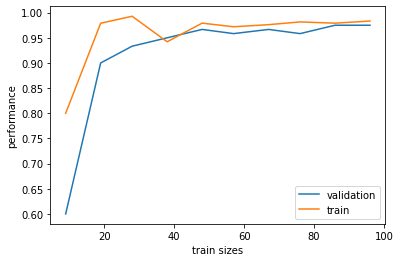

In [12]:
from sklearn.model_selection import learning_curve

# Create a classification model
model = KNeighborsClassifier()

# Amounts of data to use for training
train_sizes = np.linspace(0.1, 1.0, 10)

# Create learning curve
N, train_score, val_score = learning_curve(
    model, X_train, y_train, train_sizes=train_sizes, cv=5)
print("Amounts of data to use for training: ", N)

# plot the learning curve
# validation score
plt.plot(N, val_score.mean(axis=1), label="validation")
# train score
plt.plot(N, train_score.mean(axis=1), label="train")
plt.ylabel("performance")
plt.xlabel("train sizes")
_ = plt.legend()